# Student Habits vs Academic Performance

Dataset from https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance

In [2]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("student_habits_performance.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


### Basic Info and Shape

In [4]:
# Column names and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
# Summary statistics
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [6]:
# Shape
print('Shape:', df.shape)   # (rows, columns)

Shape: (1000, 16)


### Cleaning the Data

#### Missing values

In [7]:
# Check for missing values
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [8]:
# We will ignore the parental_education_level data in our analysis
df = df.drop(columns=["parental_education_level"])
df.shape  

(1000, 15)

#### Duplicates

In [9]:
# Check for duplicates
print(df.duplicated().sum())

0


#### Data types

In [10]:
# Fix data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

In [11]:
# Convert the following columns:
# gender, diet_quality, internet_quality
# from Dtype object to category
categorical_cols = [
    "gender",
    "diet_quality",
    "internet_quality"
]
for col in categorical_cols:
    df[col] = df[col].astype("category")

In [12]:
# Check categories
for col in df.select_dtypes(include="category").columns:
    print(f"Categories in '{col}':")
    print(df[col].cat.categories)
    print()

Categories in 'gender':
Index(['Female', 'Male', 'Other'], dtype='object')

Categories in 'diet_quality':
Index(['Fair', 'Good', 'Poor'], dtype='object')

Categories in 'internet_quality':
Index(['Average', 'Good', 'Poor'], dtype='object')



In [13]:
# Convert 'part_time_job' and 'extracurricular_participation' from object (Yes/No) to boolean (True/False)
df["part_time_job"] = df["part_time_job"].map({"Yes": True, "No": False})
df["extracurricular_participation"] = df["extracurricular_participation"].map({"Yes": True, "No": False})
# (Using .map() to explicitly define the mapping rather than .astype(bool) which won't work correctly on strings)

In [14]:
# Check if conversion worked
print(df["part_time_job"].dtype, df["part_time_job"].unique())
print(df["extracurricular_participation"].dtype, df["extracurricular_participation"].unique())

bool [False  True]
bool [ True False]


#### Spotting Outliers

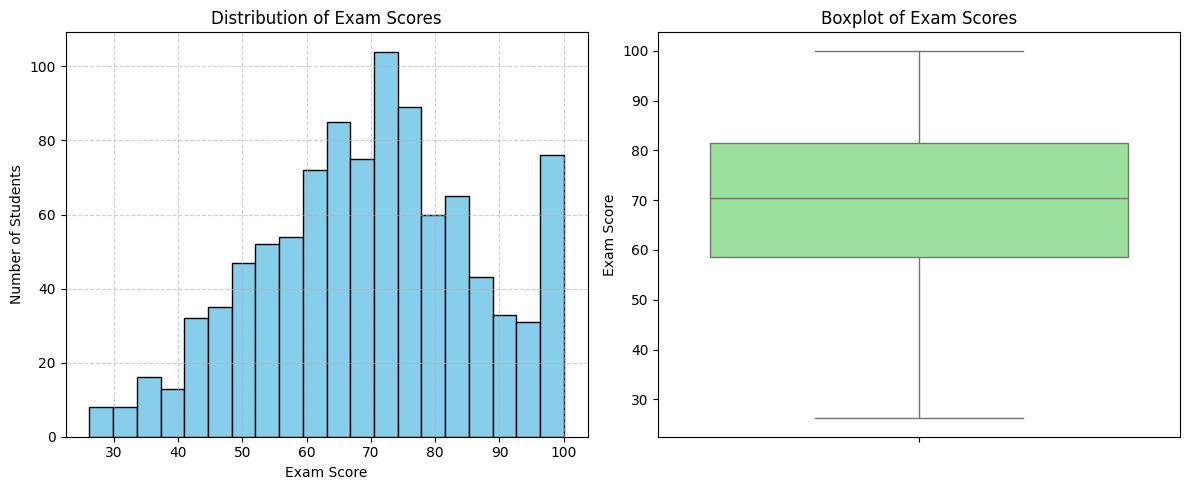

In [39]:
# Histogram and Boxplot for the exam scores
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram on the left
axes[0].hist(df["exam_score"], bins=20, color="skyblue", edgecolor="black")
axes[0].set_title("Distribution of Exam Scores")
axes[0].set_xlabel("Exam Score")
axes[0].set_ylabel("Number of Students")
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot on the right
sns.boxplot(y=df["exam_score"], ax=axes[1], color="lightgreen")
axes[1].set_title("Boxplot of Exam Scores")
axes[1].set_ylabel("Exam Score")

plt.tight_layout()
plt.show()

In [18]:
Q1 = df["exam_score"].quantile(0.25)
Q3 = df["exam_score"].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower whisker limit: {lower_whisker}")
print(f"Upper whisker limit: {upper_whisker}")


Q1: 58.475, Q3: 81.325, IQR: 22.85
Lower whisker limit: 24.199999999999996
Upper whisker limit: 115.60000000000001


In [19]:
# Low scorers (outliers from the box plot)
outliers_df = df[df['exam_score'] < lower_whisker]
outliers_df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score
265,S1265,18,Female,0.6,3.1,3.0,False,79.9,5.2,Good,1,Good,4,False,18.4
327,S1327,23,Male,0.9,2.4,2.5,False,89.2,6.9,Fair,0,Poor,1,False,23.1


I will exclude these two students from the rest of my analysis.

The low exam scores could have been due to: 
- very low study hours (0.6 and 0.9 compared to 3.55 hours average)
- poor mental health (especially the student with a rating of 1)
- high screen time

In [20]:
# Exclude the two low-scoring outliers
df = df[df['exam_score'] >= 24]
df.shape

(998, 15)

High Scorers:

Although a few students scored close to 100%, they do not qualify as statistical outliers according to the box plot (i.e., they fall within the upper whisker range). Their performance is exceptional but still within the expected distribution, so they are included in the rest of the analysis.

### Data Analysis

#### Correlations

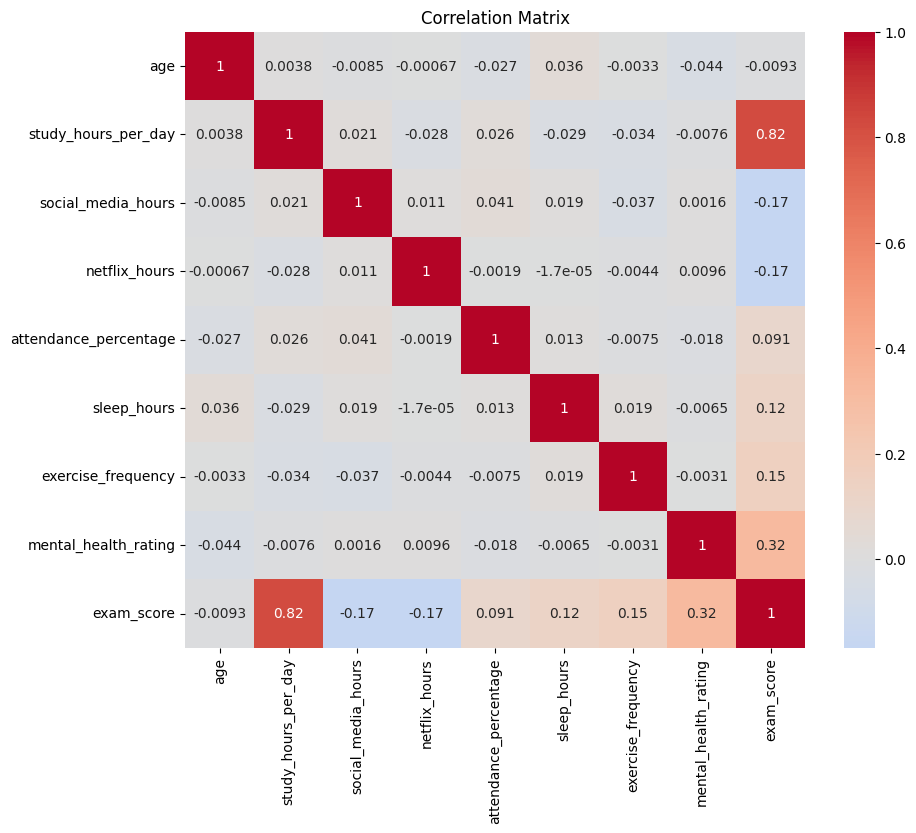

In [21]:
# Only keep numeric columns
numeric_cols = df.select_dtypes(include='number')

# Correlation matrix
corr = numeric_cols.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

Study hours per day (+0.82) - huge impact, clearly the most important factor.

Mantal Health rating - 	moderate positive correlation — supports that mental well-being helps learning.

Screen time - 

In [22]:
# Pick relevant categorical or boolean columns
cat_cols = ["gender", "part_time_job", "diet_quality", "internet_quality", "extracurricular_participation"]

# Loop through each one and show group means
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df.groupby(col)["exam_score"].mean())


--- gender ---
gender
Female    69.848333
Male      69.465546
Other     70.647619
Name: exam_score, dtype: float64

--- part_time_job ---
part_time_job
False    69.961941
True     68.743256
Name: exam_score, dtype: float64

--- diet_quality ---
diet_quality
Fair    70.537385
Good    69.501592
Poor    68.127568
Name: exam_score, dtype: float64

--- internet_quality ---
internet_quality
Average    70.643990
Good       68.760314
Poor       70.006832
Name: exam_score, dtype: float64

--- extracurricular_participation ---
extracurricular_participation
False    69.73500
True     69.62327
Name: exam_score, dtype: float64


C:\Users\marty\AppData\Local\Temp\ipykernel_16500\1544606568.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col)["exam_score"].mean())


Not much impact on the exam results from these categories, the only one that might be worth looking at is whether a student has a part time job.

In [23]:
# Let's combine the social media and Netflix daily usage into a screen time column
df['total_screen_time'] = df['social_media_hours'] + df['netflix_hours']
df[['total_screen_time', 'exam_score']].corr()

,total_screen_time,exam_score
total_screen_time,1.000000,-0.235413
exam_score,-0.235413,1.000000


SLightly higher correlation - more screen time leads to lower exam results

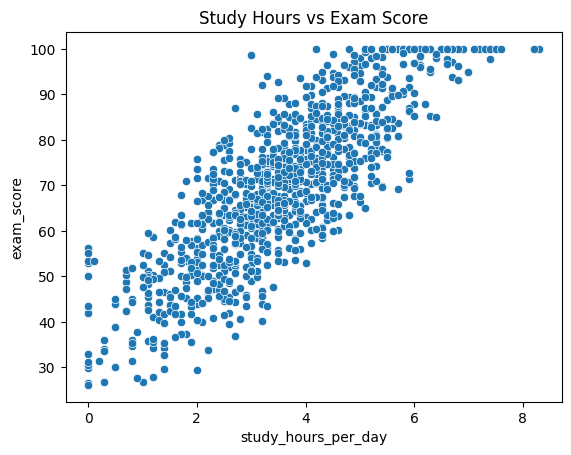

In [24]:
# Study hours vs Exam Score
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score')
plt.title('Study Hours vs Exam Score')
plt.show()

### Interaction effects

I will consider how different factors might have a combined effect on the general results.

Consider:
- Time use: Total screen time, part time job and study hours per day
- Wellbeing: Mental health rating, Diet Quality, Sleep hours, exercise frequency, potentially whether intenet quality has any impact



#### Time Use

In [40]:
# Low study group
df['low_study'] = df['study_hours_per_day'] < 1.5

# High screen time group
df['high_screen'] = df['total_screen_time'] > 4

# Part time employment
df['has_job'] = df['part_time_job'] == True

##### Study time vs Screen time

In [28]:
# Low study vs High Screen time
df.groupby(['low_study', 'high_screen'])['exam_score'].mean()

low_study  high_screen
False      False          75.835661
           True           69.024085
True       False          48.282857
           True           38.058140
Name: exam_score, dtype: float64

There is a clear drop in exam scores when screen time goes up, even for those studying more. 
This could imply that what you do in your spare time has an effect on focus and quality of study (wellbeing).

In [29]:
# Let us explore study time and screen time further by adding the wellbeing factor which we measure by mental health rating
df['low_mental_health'] = df['mental_health_rating'] <= 3
summary = df.groupby(['low_study', 'high_screen', 'low_mental_health'])['exam_score'].mean().reset_index()
summary

,low_study,high_screen,low_mental_health,exam_score
0,False,False,False,78.341304
1,False,False,True,70.303200
2,False,True,False,72.027596
3,False,True,True,61.839216
4,True,False,False,50.388462
5,True,False,True,42.200000
6,True,True,False,39.860000
7,True,True,True,33.900000


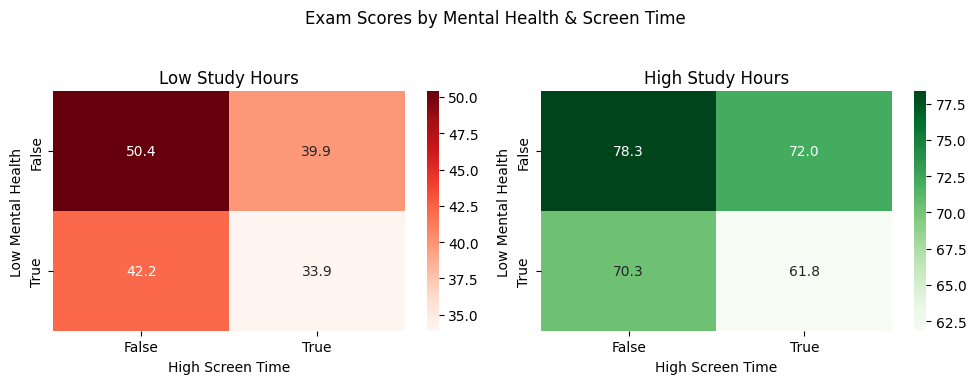

In [30]:
# Pivot table with mental health on rows, screen time on columns, separated by study group
pivot_low_study = summary[summary['low_study']].pivot(index='low_mental_health', columns='high_screen', values='exam_score')
pivot_high_study = summary[~summary['low_study']].pivot(index='low_mental_health', columns='high_screen', values='exam_score')

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(pivot_low_study, annot=True, fmt=".1f", cmap='Reds', ax=axes[0])
axes[0].set_title('Low Study Hours')
axes[0].set_ylabel('Low Mental Health')
axes[0].set_xlabel('High Screen Time')

sns.heatmap(pivot_high_study, annot=True, fmt=".1f", cmap='Greens', ax=axes[1])
axes[1].set_title('High Study Hours')
axes[1].set_ylabel('Low Mental Health')
axes[1].set_xlabel('High Screen Time')

plt.suptitle('Exam Scores by Mental Health & Screen Time')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Conclusions
- Study Hours Are Most Important\
Students who study more score significantly higher, regardless of screen time or mental health.

- High Screen Time Is Linked to Lower Scores\
Especially among low-study students, more screen time is associated with a noticeable drop in performance.

- Poor Mental Health Lowers Performance\
Students with low mental health perform worse, especially when paired with high screen time and low study time.

- The Combination Matters Most\
The lowest scores come from students with low study time, high screen use, and poor mental health. The highest scores come from the opposite group.


#### Wellbeing

##### Mental Health and Exam Performance

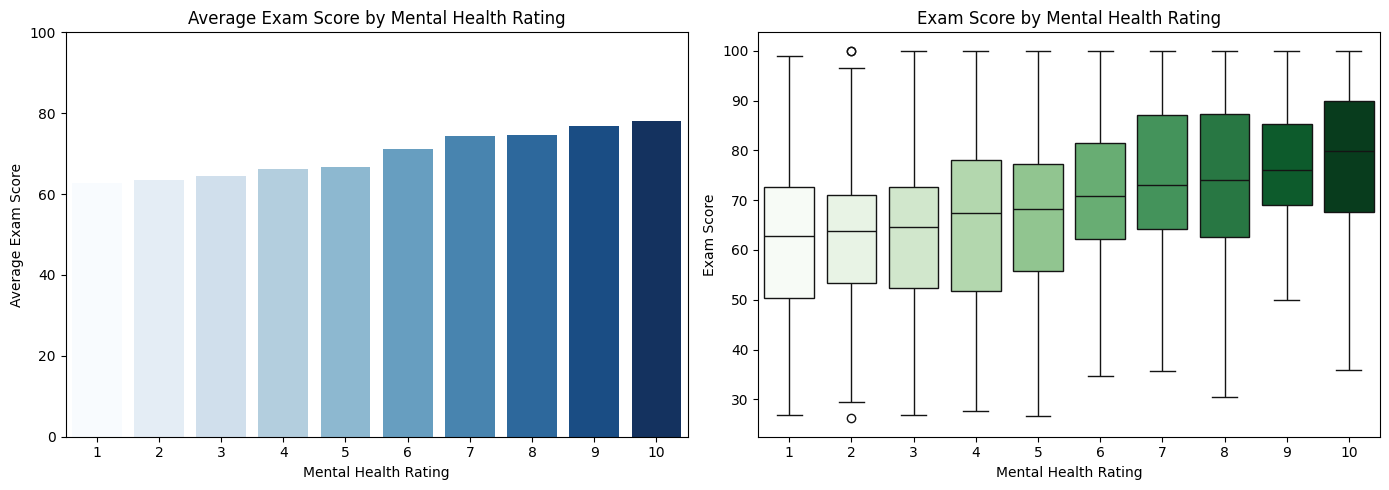

In [42]:
# Prepare data for the barplot
mean_scores = df.groupby('mental_health_rating')['exam_score'].mean().reset_index()

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barplot: Average Exam Score by Mental Health Rating
sns.barplot(
    x='mental_health_rating', y='exam_score', hue='mental_health_rating',
    data=mean_scores, ax=axes[0], palette='Blues', legend=False
)
axes[0].set_title('Average Exam Score by Mental Health Rating')
axes[0].set_xlabel('Mental Health Rating')
axes[0].set_ylabel('Average Exam Score')
axes[0].set_ylim(0, 100)

# Boxplot: Exam Score by Mental Health Rating
sns.boxplot(
    x='mental_health_rating', y='exam_score', hue='mental_health_rating',
    data=df, ax=axes[1], palette='Greens', legend=False
)
axes[1].set_title('Exam Score by Mental Health Rating')
axes[1].set_xlabel('Mental Health Rating')
axes[1].set_ylabel('Exam Score')

plt.tight_layout()
plt.show()

#### Does liefestyle affect wellbeing?

We will now explore which lifestyle factors might be associated with better or worse mental health, using similar techniques to our previous section. We focus on:

- Sleep hours

- Exercise frequency

In [33]:
# Binary split based on thresholds (adjust if needed)
df['low_sleep'] = df['sleep_hours'] < 5
df['low_exercise'] = df['exercise_frequency'] < 2

# Also keep the mental health low/high split
df['low_mental_health'] = df['mental_health_rating'] <= 4

In [34]:
df.groupby('low_sleep')['mental_health_rating'].mean()

low_sleep
False    5.453318
True     5.366972
Name: mental_health_rating, dtype: float64

In [35]:
df.groupby('low_exercise')['mental_health_rating'].mean()

low_exercise
False    5.477465
True     5.361111
Name: mental_health_rating, dtype: float64

In [36]:
summary = df.groupby(
    ['low_sleep', 'low_exercise']
).agg(
    proportion_low_mental_health=('low_mental_health', 'mean'),
    count=('low_mental_health', 'size')
).reset_index()
print(summary)

   low_sleep  low_exercise  proportion_low_mental_health  count
0      False         False                      0.394035    637
1      False          True                      0.432540    252
2       True         False                      0.452055     73
3       True          True                      0.444444     36


In [37]:
summary = df.groupby(
    ['low_sleep', 'low_exercise']
).agg(
    proportion_low_mental_health=('low_mental_health', 'mean'),
    count=('low_mental_health', 'size'),
    mean_exam_result=('exam_score', 'mean')
).reset_index()
summary

,low_sleep,low_exercise,proportion_low_mental_health,count,mean_exam_result
0,False,False,0.394035,637,71.604239
1,False,True,0.432540,252,66.913492
2,True,False,0.452055,73,66.082192
3,True,True,0.444444,36,62.830556


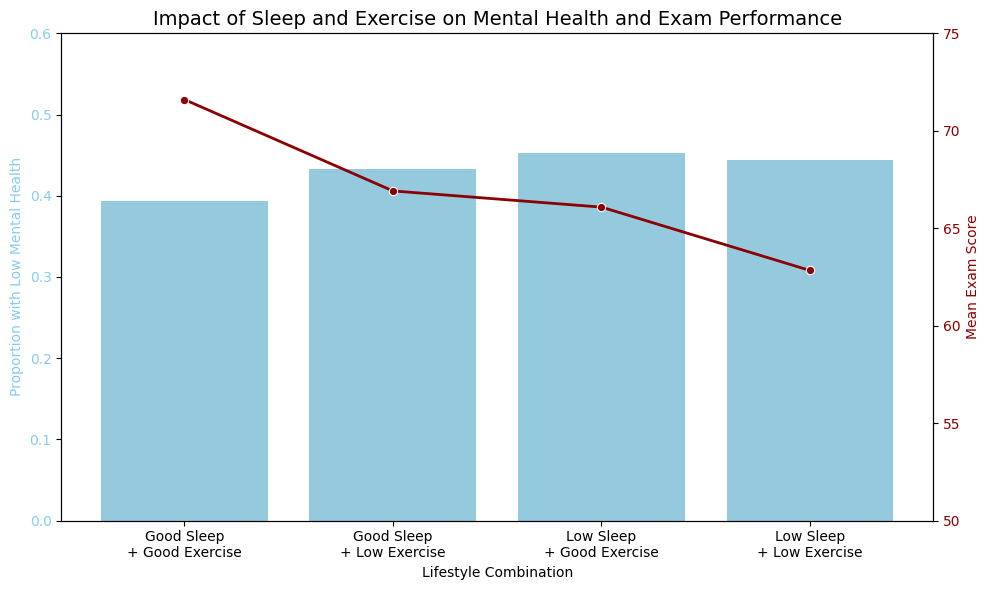

In [38]:
summary['group'] = summary.apply(lambda row: 
    f"{'Low' if row['low_sleep'] else 'Good'} Sleep\n"
    f"+ {'Low' if row['low_exercise'] else 'Good'} Exercise", axis=1)

# Set up the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot: Proportion with low mental health
sns.barplot(x='group', y='proportion_low_mental_health', data=summary, color='skyblue', ax=ax1)
ax1.set_ylabel('Proportion with Low Mental Health', color='skyblue')
ax1.set_ylim(0, 0.6)
ax1.tick_params(axis='y', labelcolor='skyblue')

# Secondary axis: Mean exam result
ax2 = ax1.twinx()
sns.lineplot(x='group', y='mean_exam_result', data=summary, color='darkred', marker='o', linewidth=2, ax=ax2)
ax2.set_ylabel('Mean Exam Score', color='darkred')
ax2.set_ylim(50, 75)
ax2.tick_params(axis='y', labelcolor='darkred')

# Titles and labels
plt.title('Impact of Sleep and Exercise on Mental Health and Exam Performance', fontsize=14)
ax1.set_xlabel('Lifestyle Combination')
ax1.set_xticks(range(len(summary['group'])))
ax1.set_xticklabels(summary['group'], rotation=0)

plt.tight_layout()
plt.show()

##### Conclusions

Mental health declines when sleep or exercise is low.

Exam performance mirrors this trend — lowest when both are low.

-----

Students who sleep enough and exercise regularly have:

- Lowest proportion of low mental health (39%)

- Highest exam score (71.6)

Those who lack both have:

- Worse mental health (44%)

- Lowest exam score (62.8)


Sleep seems slightly more impactful than exercise
When only sleep is missing (but exercise is good), mental health worsens more (45%) than when only exercise is missing (43%).

This group also performs slightly worse on exams (66.1 vs 66.9).
